In [1]:
from numpy.linalg import inv
import numpy as np
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pylab
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from math import sqrt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from matplotlib.animation import FuncAnimation
import ffmpeg

# 1st Ans

Part-(a)

In [166]:
def error(predicts,y):
    return sqrt(mean_squared_error(predicts,y))
def coordinateDescentRegression(X,y):
    try:
        X=X.values.tolist()
        y=y.values.tolist()
        n=len(X)
        X=[[1]+X[i] for i in range(n)]
        X=np.matrix(X)
        y=np.matrix(y)
    except:
        X=np.matrix(X)
        y=np.matrix(y)
    X=np.c_[np.ones(np.shape(X)[0]),X]
    m=X.shape[1]
    y=y.T
    n=X.shape[0]
    theta=np.matrix(list(np.zeros(m))).T
    theta=theta*2
    print('INIT Theta = '+' '.join(map(str,theta)))
    a=X*theta-y
    for i in range(3):
#         for j in range(len(theta)):
        j=i%m
        print('-'*40)
        print('Chosen direction =',j)
        print('current theta = '+' '.join(map(str,theta)))
        h=float(theta[j])
        print('theta[j] = '+' '.join(map(str,theta[j])))
        print('X[:,j] = '+' '.join(map(str,X[:,j])))
        print('X*theta = '+' '.join(map(str,X*theta)))
#         print('y-X*theta = '+' '.join(map(str,y-X*theta)))
        print('X*theta-X[:,j]*theta[j] = '+' '.join(map(str,X*theta-X[:,j]*h)))
        a=y-X*theta+X[:,j]*h
        print('yi-yihat^(-j) = ',' '.join(map(str,a)))
        z=np.sum(np.square(X[:,j]))
        phoj=float(X[:,j].T*a)
        print('phoj = X[:,j].T*a \n =>  =',phoj)
        print('z = ',z)
        theta[j]=phoj/z
        print('Theta['+str(j)+'] =',theta[j])
    return theta
X=[[1],[3],[6]]
y=[6,10,16]
coordinateDescentRegression(X,y)

INIT Theta = [[0.]] [[0.]]
----------------------------------------
Chosen direction = 0
current theta = [[0.]] [[0.]]
theta[j] = [[0.]]
X[:,j] = [[1.]] [[1.]] [[1.]]
X*theta = [[0.]] [[0.]] [[0.]]
X*theta-X[:,j]*theta[j] = [[0.]] [[0.]] [[0.]]
yi-yihat^(-j) =  [[6.]] [[10.]] [[16.]]
phoj = X[:,j].T*a 
 =>  = 32.0
z =  3.0
Theta[0] = [[10.66666667]]
----------------------------------------
Chosen direction = 1
current theta = [[10.66666667]] [[0.]]
theta[j] = [[0.]]
X[:,j] = [[1.]] [[3.]] [[6.]]
X*theta = [[10.66666667]] [[10.66666667]] [[10.66666667]]
X*theta-X[:,j]*theta[j] = [[10.66666667]] [[10.66666667]] [[10.66666667]]
yi-yihat^(-j) =  [[-4.66666667]] [[-0.66666667]] [[5.33333333]]
phoj = X[:,j].T*a 
 =>  = 25.333333333333336
z =  46.0
Theta[1] = [[0.55072464]]
----------------------------------------
Chosen direction = 0
current theta = [[10.66666667]] [[0.55072464]]
theta[j] = [[10.66666667]]
X[:,j] = [[1.]] [[1.]] [[1.]]
X*theta = [[11.2173913]] [[12.31884058]] [[13.97101449]]

matrix([[8.83091787],
        [0.55072464]])

Part-(b)

In [167]:
def error(predicts,y):
    return sqrt(mean_squared_error(predicts,y))
def sgdRegression(X,y,alpha):
    try:
        X=X.values.tolist()
        y=y.values.tolist()
        n=len(X)
        X=[[1]+X[i] for i in range(n)]
        X=np.matrix(X)
        y=np.matrix(y)
    except:
        X=np.matrix(X)
        y=np.matrix(y)
    X=np.c_[np.ones(np.shape(X)[0]),X]
    m=X.shape[1]
    y=y.T
    n=X.shape[0]
    theta=np.matrix(list(np.zeros(m))).T
    theta=theta*5
    print('INIT theta = ',theta)
    a=X*theta-y
    for i in range(3):
        i=i%n
        thetahat=theta.copy()
        print('-'*50)
        print('Iteration = ',i)
        print('theta = ',theta)
        print('X[i,:] = ',' '.join(map(str,X[i,:])))
        a=float(X[i,:]*theta-y[i])
        print('y[i] = ',y[i])
        print('y[i]-X[i,:]*theta = ',y[i]-X[i,:]*theta)
        for j in range(len(theta)):
            thetahat[j]=thetahat[j]-2*(alpha)*a*X[i,j]
        theta=thetahat
        print('final theta = ',theta)
    return theta
# X=X.values.tolist()
X=[[1],[3],[6]]
y=[6,10,16]
sgdRegression(X,y,0.01)

INIT theta =  [[0.]
 [0.]]
--------------------------------------------------
Iteration =  0
theta =  [[0.]
 [0.]]
X[i,:] =  [[1. 1.]]
y[i] =  [[6]]
y[i]-X[i,:]*theta =  [[6.]]
final theta =  [[0.12]
 [0.12]]
--------------------------------------------------
Iteration =  1
theta =  [[0.12]
 [0.12]]
X[i,:] =  [[1. 3.]]
y[i] =  [[10]]
y[i]-X[i,:]*theta =  [[9.52]]
final theta =  [[0.3104]
 [0.6912]]
--------------------------------------------------
Iteration =  2
theta =  [[0.3104]
 [0.6912]]
X[i,:] =  [[1. 6.]]
y[i] =  [[16]]
y[i]-X[i,:]*theta =  [[11.5424]]
final theta =  [[0.541248]
 [2.076288]]


matrix([[0.541248],
        [2.076288]])

# 2nd Ans

Part-(a)

In [168]:
def normalEquationRegression(X,y,lamda):
    from numpy.linalg import inv
    try:
        X=X.values.tolist()
        y=y.values.tolist()
        n=len(X)
        X=[[1]+X[i] for i in range(n)]
        X=np.matrix(X)
        y=np.matrix(y)
    except:
        X=np.matrix(X)
        y=np.matrix(y)
    X=np.c_[np.ones(np.shape(X)[0]),X]
    new=lamda*np.matrix(np.eye(X.shape[1]))
    inverted=inv(X.T*X+new)
    s=X.T*y.T
    theta=inverted*s
    print('Intercept:',theta[0])
    print('Coefficeints:',theta[1:])
    return theta
X=[[1],[2],[3]]
y=[1,2,3]
lamda=1
normalEquationRegression(X,y,lamda)

Intercept: [[0.25]]
Coefficeints: [[0.83333333]]


matrix([[0.25      ],
        [0.83333333]])

Part-(b)

In [169]:
def error(predicts,y):
    return sqrt(mean_squared_error(predicts,y))
def coordinateDescentRegression(X,y):
    try:
        X=X.values.tolist()
        y=y.values.tolist()
        n=len(X)
        X=[[1]+X[i] for i in range(n)]
        X=np.matrix(X)
        y=np.matrix(y)
    except:
        X=np.matrix(X)
        y=np.matrix(y)
    X=np.c_[np.ones(np.shape(X)[0]),X]
    m=X.shape[1]
    y=y.T
    n=X.shape[0]
    theta=np.matrix(list(np.random.random(m)+6)).T
    theta=theta
    a=X*theta-y
    b=[]
    for i in range(50):
        j=i%len(theta)
        h=float(theta[j])
        a=y-X*theta+X[:,j]*h
        z=np.sum(np.square(X[:,j]))
        phoj=float(X[:,j].T*a)
        theta[j]=phoj/z
#         print(float(theta[0]))
        b=b+[[float(theta[0]),float(theta[1])]]
    return theta,b
X=[[1],[2],[3]]
y=[1,2,3]
theta,allthetas=coordinateDescentRegression(X,y)
print(theta)
# print(allthetas)

[[-0.26752924]
 [ 1.11465539]]


Part-(c)

In [170]:
def error(predicts,y):
    return sqrt(mean_squared_error(predicts,y))
def coordinateDescentLasso(X,y,lamda):
    try:
        X=X.values.tolist()
        y=y.values.tolist()
        n=len(X)
        X=[[1]+X[i] for i in range(n)]
        X=np.matrix(X)
        y=np.matrix(y)
    except:
        X=np.matrix(X)
        y=np.matrix(y)
    X=np.c_[np.ones(np.shape(X)[0]),X]
    m=X.shape[1]
    y=y.T
    n=X.shape[0]
    theta=np.matrix(list(np.random.random(m))).T
    theta=theta*2
    a=X*theta-y
    for i in range(1000):
        for j in range(len(theta)):
            h=float(theta[j])
            a=y-X*theta+X[:,j]*h
            z=np.sum(np.square(X[:,j]))
            phoj=float(X[:,j].T*a)
            if phoj<-lamda*0.5:
                phoj=phoj+lamda*0.5
            elif phoj>lamda*0.5:
                phoj=phoj-lamda*0.5
            else:
                phoj=0
            theta[j]=phoj/z
    return theta
X=[[1],[2],[3]]
y=[1,2,3]
lamda=0.1
coordinateDescentLasso(X,y,lamda)

matrix([[0.        ],
        [0.99642857]])

Part-(d)

In [190]:
def error(predicts,y):
    return sqrt(mean_squared_error(predicts,y))
def sgdRegression(X,y,alpha):
    try:
        X=X.values.tolist()
        y=y.values.tolist()
        n=len(X)
        X=[[1]+X[i] for i in range(n)]
        X=np.matrix(X)
        y=np.matrix(y)
    except:
        X=np.matrix(X)
        y=np.matrix(y)
    X=np.c_[np.ones(np.shape(X)[0]),X]
    m=X.shape[1]
    y=y.T
    n=X.shape[0]
    theta=np.matrix(list(np.zeros(m))).T
    theta=theta
    a=X*theta-y
    b=[]
    for i in range(70):
        i=i%n
        thetahat=theta.copy()
        a=float(X[i,:]*theta-y[i])
        for j in range(len(theta)):
            thetahat[j]=thetahat[j]-2*(alpha)*a*X[i,j]
        theta=thetahat
        b=b+[[float(theta[0]),float(theta[1])]]
    return theta,b
# X=X.values.tolist()
X=[[1],[2],[3]]
y=[1,2,3]
theta,alltheta=sgdRegression(X,y,0.12)
print(theta)
# print(alltheta)

[[0.01428166]
 [0.99420431]]


Part-(e)

In [172]:
import autograd.numpy as np
def gradientDescentAutogradLasso(X,y,alpha):
    def error(theta):
        theta=np.matrix(theta).T
        a=y-X*theta
        return np.mean(np.square(a))+alpha*np.sum(abs(theta))
    from autograd import grad
    n=len(X)
    X=np.matrix(X)
    X=np.c_[np.ones(np.shape(X)[0]),X]
    m=np.shape(X)[1]
    y=np.matrix(y).T
#     np.random.seed(7)
    theta=np.random.random(m).T
#     theta=theta*7
    error(theta)
    grad_fun=grad(error)
    for i in range(100):
#         print(theta)
        thetahat=theta.copy()
#         print(thetahat)
        thetahat=thetahat-alpha*grad_fun(thetahat)
        theta=thetahat
    return theta
xnew=[[1],[3],[6]]
ynew=[6,10,16]
# Xhat=X.values.tolist()
# yhat=y.values.tolist()
gradientDescentAutogradLasso(xnew,ynew,0.01)

array([1.97191398, 2.44819444])

# 3rd Ans

Part-(a)

In [204]:
x = np.array(np.arange(-6, 9, 0.1))
y = np.array(np.arange(-6, 9, 0.1))
xnew = np.array([[1], [3], [6]])
ynew = np.reshape(np.array([[6], [10], [16]]), (3,1))
xnew = np.append(np.ones((3,1)), np.reshape(xnew, (3,1)), axis=1)
X,Y = np.meshgrid(x, y, sparse=True)
X = X.T
z = np.zeros((X.shape[0], X.shape[0]))
thetahat = np.zeros((2,1))
for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        thetahat[0, 0] = X[i, 0]
        thetahat[1, 0] = Y[j, 0]
        z[i,j]=np.sum((xnew.dot(thetahat)-ynew)**2) 
X, Y = np.meshgrid(X, Y)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 8))
fig.set_tight_layout(True)
ax2.contour(X, Y, z,50)
ax2.set_title('Stochastic gradient descent')
ax2.set_xlabel('Theta1')
ax2.set_ylabel('Theta0')
X=[[1],[3],[6]]
Y=[6,10,16]
w_prior=0
b_prior=0
asdf,thetas= sgdRegression(X,Y,0.05)
w_s=[i[1] for i in thetas]
b_s=[i[0] for i in thetas]
ax1.scatter(X, Y, color='grey', s=10)
X=np.matrix(X)
line, = ax1.plot(X, X*w_prior+b_prior, 'r-', linewidth=1)
def update(i):
    line.set_ydata(X*w_s[i]+b_s[i])
    ax1.set_xlabel('Iteration '+str(i+1))
    ax1.set_ylabel('Stochastic gradient descent fit')
    if i!=69:
        ax2.arrow(w_s[i],b_s[i],w_s[i+1]-w_s[i],b_s[i+1]-b_s[i],head_width=0.005, head_length=0.01, fc='k', ec='k')
    else:
        ax2.arrow(w_s[i],b_s[i],0,0,head_width=0.005, head_length=0.01, fc='k', ec='k')
    return line, (ax1,ax2)
anim = FuncAnimation(fig, update, frames=np.arange(0, 70), interval=1)
anim.save('sgd_fit.gif', dpi=80,writer='pillow')
plt.close()

Part-(b)

In [205]:
x = np.array(np.arange(-6, 9, 0.1))
y = np.array(np.arange(-6, 9, 0.1))
xnew = np.array([[1], [3], [6]])
ynew = np.reshape(np.array([[6], [10], [16]]), (3,1))
xnew = np.append(np.ones((3,1)), np.reshape(xnew, (3,1)), axis=1)
X,Y = np.meshgrid(x, y, sparse=True)
X = X.T
z = np.zeros((X.shape[0], X.shape[0]))
thetahat = np.zeros((2,1))
for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        thetahat[0, 0] = X[i, 0]
        thetahat[1, 0] = Y[j, 0]
        z[i,j]=np.sum((xnew.dot(thetahat)-ynew)**2) 
X, Y = np.meshgrid(X, Y)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 8))
fig.set_tight_layout(True)
ax2.contour(X, Y, z,50)
ax2.set_title('Coordinate gradient descent')
ax2.set_xlabel('Theta1')
ax2.set_ylabel('Theta0')
X=[[1],[3],[6]]
Y=[6,10,16]
w_prior=0
b_prior=0
asdf,thetas= coordinateDescentRegression(X,Y)
w_s=[i[1] for i in thetas]
b_s=[i[0] for i in thetas]
ax1.scatter(X, Y, color='grey', s=4)
X=np.matrix(X)
line, = ax1.plot(X, X*w_prior+b_prior, 'r-', linewidth=1)
def update(i):
    line.set_ydata(X*w_s[i]+b_s[i])
    ax1.set_xlabel('Iteration '+str(i+1))
    ax1.set_ylabel('Coordinate gradient descent fit')
    if i!=49:
        ax2.arrow(w_s[i],b_s[i],w_s[i+1]-w_s[i],b_s[i+1]-b_s[i],head_width=0.005, head_length=0.01, fc='k', ec='k')
    else:
        ax2.arrow(w_s[i],b_s[i],0,0,head_width=0.005, head_length=0.01, fc='k', ec='k')
    format_axes(ax1)
    format_axes(ax2)
    return line, (ax1,ax2)
anim = FuncAnimation(fig, update, frames=np.arange(0, 50), interval=1)
anim.save('CD_fit2.gif', dpi=80,writer='pillow')
plt.close()

# 4th Ans

Part-(a)

In [173]:
X=[[1,2],[2,4],[3,6],[4,8]]
y=[2,3,4,5]
from sklearn import linear_model
reg = linear_model.Ridge(alpha=1)
reg.fit(X, y)
print(reg.coef_,reg.intercept_)
reg.alpha

[0.19230769 0.38461538] 1.0961538461538463


1

Part-(b)

In [206]:
X=[[1,2],[2,4],[3,6],[4,8]]
y=[2,3,4,5]
lamda=1
normalEquationRegression(X,y,lamda)

Intercept: [[0.44705882]]
Coefficeints: [[0.23529412]
 [0.47058824]]


matrix([[0.44705882],
        [0.23529412],
        [0.47058824]])

# 5th Ans

Part-(a): 5-fold cross validation for Ridge regression

In [2]:
X=pd.read_csv('Real estate valuation data set.csv')
y=X['Y house price of unit area']
X=X.drop(['No'],axis=1)
X=X.rename(index=str,columns={'X1 transaction date':"x1",'X2 house age':"x2","X3 distance to the nearest MRT station":"x3","X4 number of convenience stores":
                           "x4","X5 latitude":"x5","X6 longitude":"x6","Y house price of unit area":"y"})
X=X.drop(['y'],axis=1)

In [3]:
lamda=list(np.linspace(0,10,100))
kf = KFold(n_splits=5,random_state=7)
kf.get_n_splits(X)
fold=0
for train_index, test_index in kf.split(X):
    print('Fold = ',fold+1,'-'*30)
    fold+=1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=7)
    lamdanew=1
    verror=10000000000
    for i in lamda:
        model = Ridge(alpha=i,normalize=True)
        model.fit(X_train, y_train)
        yhat=model.predict(X_val)
        val_error=mean_squared_error(yhat,y_val)
        if val_error<verror:
            lamdanew=i
            score=val_error**0.5
            verror=val_error
    model=Ridge(alpha=lamdanew,normalize=True)
    model.fit(X_train,y_train)
    train_error=mean_squared_error(y_train,model.predict(X_train))**0.5
    test_error=mean_squared_error(y_test,model.predict(X_test))**0.5
    print('Optimal penalty coefficient: ',lamdanew)
    print('Train error: ',train_error)
    print('Cross validation error: ',score)
    print('Test error: ',test_error)

Fold =  1 ------------------------------
Optimal penalty coefficient:  0.30303030303030304
Train error:  9.347148528029825
Cross validation error:  9.151875923421883
Test error:  7.310287790596093
Fold =  2 ------------------------------
Optimal penalty coefficient:  0.10101010101010101
Train error:  8.985622397826464
Cross validation error:  7.231718413381548
Test error:  9.473984667249487
Fold =  3 ------------------------------
Optimal penalty coefficient:  0.30303030303030304
Train error:  9.44121031014661
Cross validation error:  8.208602416114228
Test error:  7.603956458304765
Fold =  4 ------------------------------
Optimal penalty coefficient:  0.30303030303030304
Train error:  8.12989513229204
Cross validation error:  7.830821932311089
Test error:  11.745127484028233
Fold =  5 ------------------------------
Optimal penalty coefficient:  0.30303030303030304
Train error:  9.404119871051051
Cross validation error:  8.109080175434437
Test error:  7.8414875880881905


Part-(b): 5 fold cross validation for Lasso regression

In [177]:
X=pd.read_csv('Real estate valuation data set.csv')
y=X['Y house price of unit area']
X=X.drop(['No'],axis=1)
X=X.rename(index=str,columns={'X1 transaction date':"x1",'X2 house age':"x2","X3 distance to the nearest MRT station":"x3","X4 number of convenience stores":
                           "x4","X5 latitude":"x5","X6 longitude":"x6","Y house price of unit area":"y"})
X=X.drop(['y'],axis=1)

In [178]:
lamda=list(np.linspace(0,10,100))
kf = KFold(n_splits=5)
kf.get_n_splits(X)
fold=0
for train_index, test_index in kf.split(X):
    print('Fold = ',fold+1,'-'*30)
    fold+=1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=7)
    lamdanew=1
    verror=10000000000
    for i in lamda:
        model = Lasso(alpha=i,normalize=True)
        model.fit(X_train, y_train)
        yhat=model.predict(X_val)
        val_error=mean_squared_error(yhat,y_val)
        if val_error<verror:
            lamdanew=i
            score=val_error**0.5
            verror=val_error
    model=Ridge(alpha=lamdanew,normalize=True)
    model.fit(X_train,y_train)
    train_error=mean_squared_error(y_train,model.predict(X_train))**0.5
    test_error=mean_squared_error(y_test,model.predict(X_test))**0.5
    print('Optimal penalty coefficient: ',lamdanew)
    print('Train error: ',train_error)
    print('Cross validation error: ',score)
    print('Test error: ',test_error)

Fold =  1 ------------------------------


C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Optimal penalty coefficient:  0.0
Train error:  9.190444965603504
Cross validation error:  9.26433006438894
Test error:  7.12361347135283
Fold =  2 ------------------------------
Optimal penalty coefficient:  0.0
Train error:  8.9522302656328
Cross validation error:  7.246515976446366
Test error:  9.482604912328624
Fold =  3 ------------------------------


C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
C:\Users\ren

Optimal penalty coefficient:  0.0
Train error:  9.275553343157036
Cross validation error:  8.294451030975793
Test error:  7.579925029213667
Fold =  4 ------------------------------


C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Optimal penalty coefficient:  0.0
Train error:  7.965337315985136
Cross validation error:  7.9894676436839145
Test error:  11.605706848543027
Fold =  5 ------------------------------


C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Optimal penalty coefficient:  0.0
Train error:  9.264292067518877
Cross validation error:  8.254937937660602
Test error:  7.756834913788581


Part-(c): Regularisation path for Lasso and Ridge regression

In [207]:
X=pd.read_csv('Real estate valuation data set.csv')
y=X['Y house price of unit area']
X=X.drop(['No'],axis=1)
X=X.rename(index=str,columns={'X1 transaction date':"x1",'X2 house age':"x2","X3 distance to the nearest MRT station":"x3","X4 number of convenience stores":
                           "x4","X5 latitude":"x5","X6 longitude":"x6","Y house price of unit area":"y"})
X=X.drop(["x1",'y'],axis=1)

Lasso regression

C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


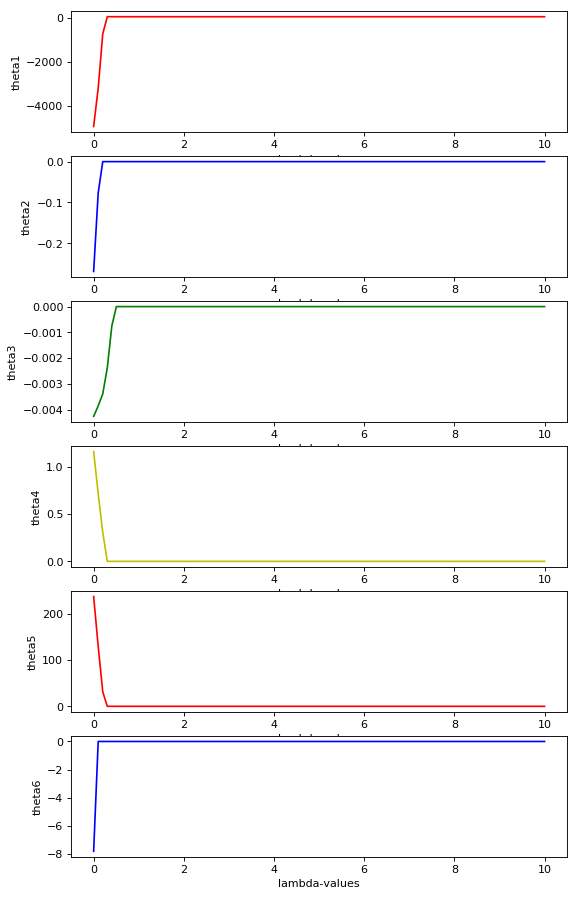

In [208]:
fig=pylab.figure(figsize=(8, 14), dpi= 80, facecolor='w', edgecolor='k')
lamda=list(np.linspace(0,10,100))
theta1=[]
theta2=[]
theta3=[]
theta4=[]
theta5=[]
theta6=[]
for i in lamda:
    model = Lasso(alpha=i,normalize=True)
    model.fit(X, y)
    theta1=theta1+[model.intercept_]
    j =list(model.coef_)
    theta2=theta2+[j[0]]
    theta3=theta3+[j[1]]
    theta4=theta4+[j[2]]
    theta5=theta5+[j[3]]
    theta6=theta6+[j[4]]
pylab.subplot(6,1,1)
pylab.plot(lamda,theta1,'-r')
pylab.xlabel('lambda-values')
pylab.ylabel('theta1')
pylab.subplot(6,1,2)
pylab.plot(lamda,theta2,'-b')
pylab.xlabel('lambda-values')
pylab.ylabel('theta2')
pylab.subplot(6,1,3)
pylab.plot(lamda,theta3,'-g')
pylab.xlabel('lambda-values')
pylab.ylabel('theta3')
pylab.subplot(6,1,4)
pylab.plot(lamda,theta4,'-y')
pylab.xlabel('lambda-values')
pylab.ylabel('theta4')
pylab.subplot(6,1,5)
pylab.plot(lamda,theta5,'-r')
pylab.xlabel('lambda-values')
pylab.ylabel('theta5')
pylab.subplot(6,1,6)
pylab.plot(lamda,theta6,'-b')
pylab.xlabel('lambda-values')
pylab.ylabel('theta6')
pylab.show()

Ridge regression

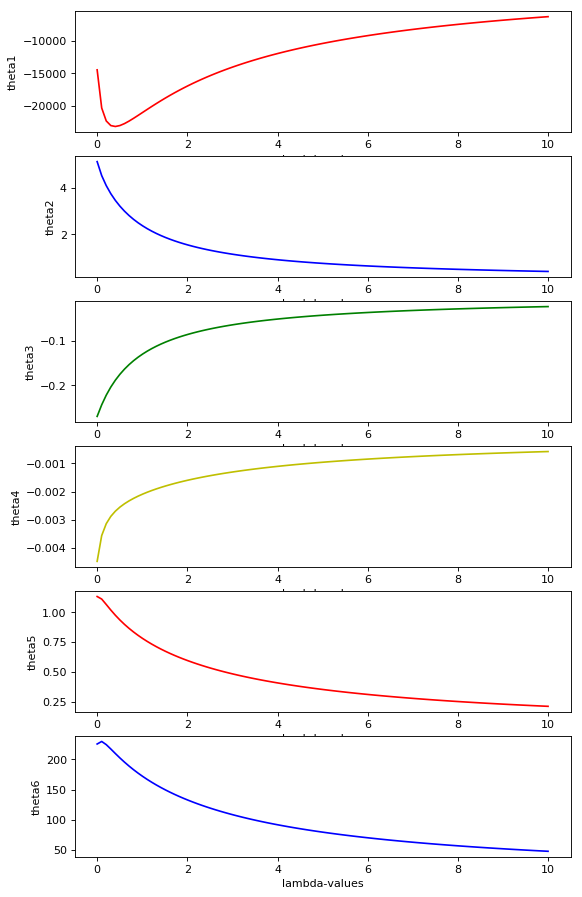

In [188]:
fig=pylab.figure(figsize=(8, 14), dpi= 80, facecolor='w', edgecolor='k')
lamda=list(np.linspace(0,10,100))
theta1=[]
theta2=[]
theta3=[]
theta4=[]
theta5=[]
theta6=[]
for i in lamda:
    model = Ridge(alpha=i,normalize=True)
    model.fit(X, y)
    theta1=theta1+[model.intercept_]
    j =list(model.coef_)
    theta2=theta2+[j[0]]
    theta3=theta3+[j[1]]
    theta4=theta4+[j[2]]
    theta5=theta5+[j[3]]
    theta6=theta6+[j[4]]
pylab.subplot(6,1,1)
pylab.plot(lamda,theta1,'-r')
pylab.xlabel('lambda-values')
pylab.ylabel('theta1')
pylab.subplot(6,1,2)
pylab.plot(lamda,theta2,'-b')
pylab.xlabel('lambda-values')
pylab.ylabel('theta2')
pylab.subplot(6,1,3)
pylab.plot(lamda,theta3,'-g')
pylab.xlabel('lambda-values')
pylab.ylabel('theta3')
pylab.subplot(6,1,4)
pylab.plot(lamda,theta4,'-y')
pylab.xlabel('lambda-values')
pylab.ylabel('theta4')
pylab.subplot(6,1,5)
pylab.plot(lamda,theta5,'-r')
pylab.xlabel('lambda-values')
pylab.ylabel('theta5')
pylab.subplot(6,1,6)
pylab.plot(lamda,theta6,'-b')
pylab.xlabel('lambda-values')
pylab.ylabel('theta6')
pylab.show()

Part-(d): Train and test error for Lasso and Ridge regression

Lasso regression

In [162]:
X=pd.read_csv('Real estate valuation data set.csv')
y=X['Y house price of unit area']
X=X.drop(['No'],axis=1)
X=X.rename(index=str,columns={'X1 transaction date':"x1",'X2 house age':"x2","X3 distance to the nearest MRT station":"x3","X4 number of convenience stores":
                           "x4","X5 latitude":"x5","X6 longitude":"x6","Y house price of unit area":"y"})
X=X.drop(["x1",'y'],axis=1)

C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


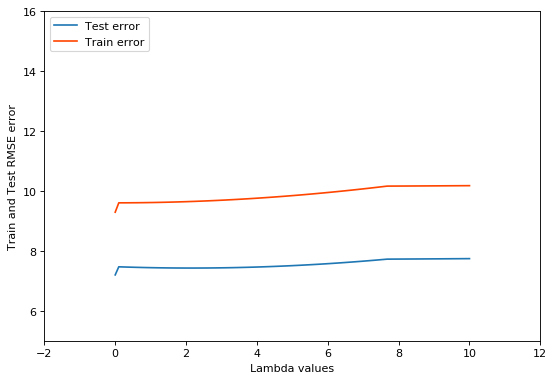

In [163]:
fig=pylab.figure(figsize=(8, 12), dpi= 80, facecolor='w', edgecolor='k')
lamda=list(np.linspace(0,10,100))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
lamdanew=1
verror=10000000000
errors=[]
errors2=[]
for i in lamda:
    model = Lasso(alpha=i,normalize=True)
    model.fit(X_train, y_train)
    yhat2=model.predict(X_train)
    yhat=model.predict(X_test)
    val_error=mean_squared_error(yhat,y_test)
    val_error2=mean_squared_error(yhat2,y_train)
    errors=errors+[val_error**0.5]
    errors2=errors2+[val_error2**0.5]
pylab.subplot(2,1,1)
pylab.plot(lamda,errors,'-')
pylab.xlabel('Lambda values')
# pylab.ylabel('TEST RMSE error')
# pylab.subplot(2,1,2)
pylab.plot(lamda,errors2,'-',color='orangered')
# pylab.xlabel('Lambda values')
pylab.ylabel('Train and Test RMSE error')
pylab.legend(('Test error','Train error'),loc='upper left')
ax=pylab.gca()
ax.set_ylim(5,16)
ax.set_xlim(-2,12)
pylab.show()

Ridge regression

In [79]:
X=pd.read_csv('Real estate valuation data set.csv')
y=X['Y house price of unit area']
X=X.drop(['No'],axis=1)
X=X.rename(index=str,columns={'X1 transaction date':"x1",'X2 house age':"x2","X3 distance to the nearest MRT station":"x3","X4 number of convenience stores":
                           "x4","X5 latitude":"x5","X6 longitude":"x6","Y house price of unit area":"y"})
X=X.drop(['y'],axis=1)

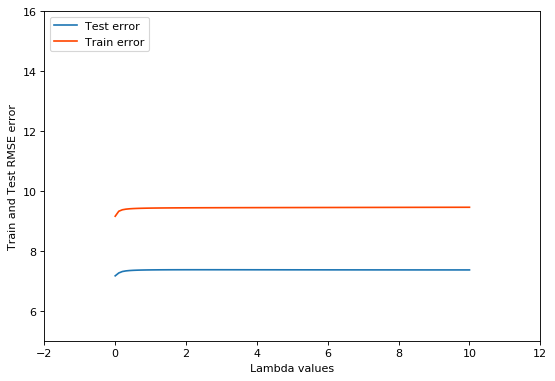

In [80]:
fig=pylab.figure(figsize=(8, 12), dpi= 80, facecolor='w', edgecolor='k')
lamda=list(np.linspace(0,10,100))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
lamdanew=1
verror=10000000000
errors=[]
errors2=[]
for i in lamda:
    model = Ridge(alpha=i,normalize=True)
    model.fit(X_train, y_train)
    yhat2=model.predict(X_train)
    yhat=model.predict(X_test)
    val_error=mean_squared_error(yhat,y_test)
    val_error2=mean_squared_error(yhat2,y_train)
    errors=errors+[val_error**0.5]
    errors2=errors2+[val_error2**0.5]
pylab.subplot(2,1,1)
pylab.plot(lamda,errors,'-')
pylab.xlabel('Lambda values')
# pylab.ylabel('TEST RMSE error')
# pylab.subplot(2,1,2)
pylab.plot(lamda,errors2,'-',color='orangered')
# pylab.xlabel('Lambda values')
pylab.ylabel('Train and Test RMSE error')
pylab.legend(('Test error','Train error'),loc='upper left')
ax=pylab.gca()
ax.set_ylim(5,16)
ax.set_xlim(-2,12)
pylab.show()